Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
trainorig = pd.read_csv('train.csv', sep=',') 
trainorig

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
len(trainorig)

891

In [7]:
trainorig.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
trainorig.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
medianage=trainorig.Age.median()
medianage

28.0

In [10]:
train=trainorig.copy()#created a copy for filling missing values in age
train.Age=trainorig.Age.fillna(value=medianage)

In [11]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [12]:
train['Age'].min(),train['Age'].max()

(0.42, 80.0)

In [13]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
train['Survived'].value_counts()*100/len(train)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [15]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

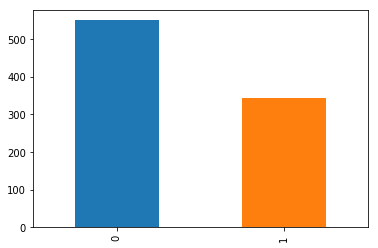

In [17]:
%matplotlib inline
alpha_color=0.5
train['Survived'].value_counts().plot(kind='bar')

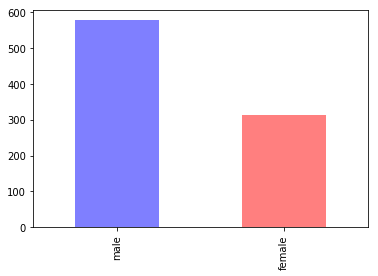

In [18]:
train['Sex'].value_counts().plot(kind='bar',color=['b','r'],alpha=alpha_color)

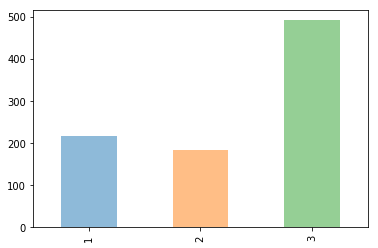

In [19]:
train['Pclass'].value_counts().sort_index().plot(kind='bar',alpha=alpha_color)

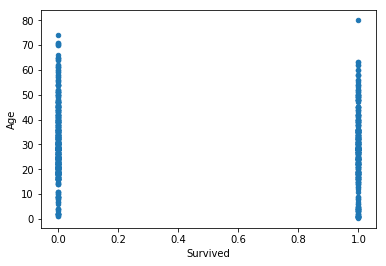

In [20]:
train.plot(kind='scatter',x='Survived',y='Age')

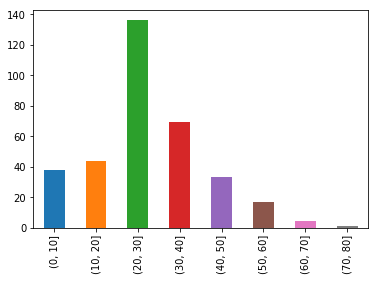

In [21]:
bins=[0,10,20,30,40,50,60,70,80]
train['AgeBin']=pd.cut(train['Age'],bins)
train[train['Survived']==1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

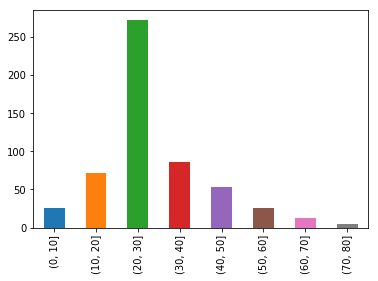

In [22]:
train[train['Survived']==0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

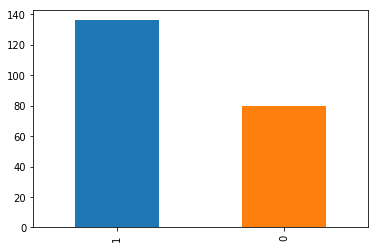

In [23]:
train[train['Pclass']==1]['Survived'].value_counts().plot(kind='bar')

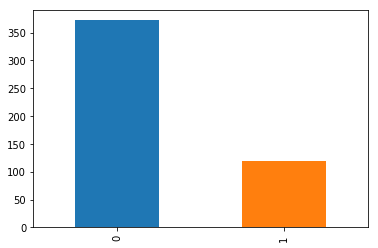

In [24]:
train[train['Pclass']==3]['Survived'].value_counts().plot(kind='bar')

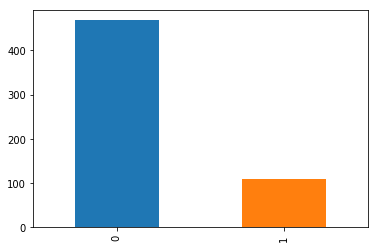

In [25]:
train[train['Sex']=='male']['Survived'].value_counts().plot(kind='bar')

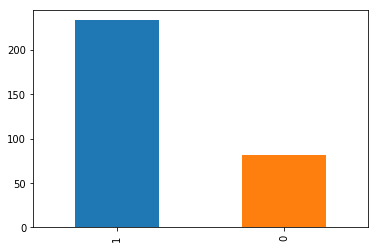

In [26]:
train[train['Sex']=='female']['Survived'].value_counts().plot(kind='bar')

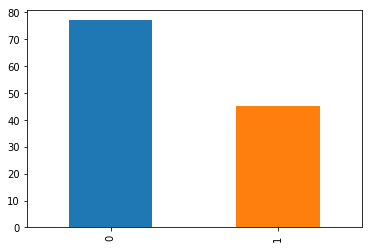

In [27]:
train[(train['Sex']=='male')&(train['Pclass']==1)]['Survived'].value_counts().plot(kind='bar')

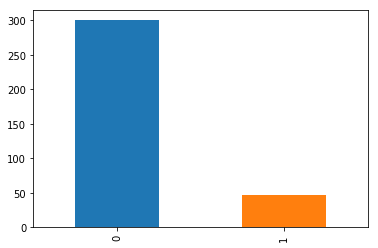

In [28]:
train[(train['Sex']=='male')&(train['Pclass']==3)]['Survived'].value_counts().plot(kind='bar')

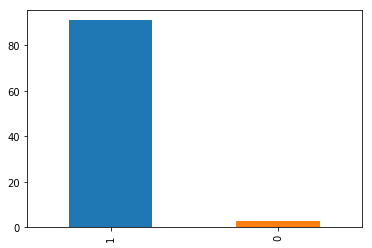

In [29]:
train[(train['Sex']=='female')&(train['Pclass']==1)]['Survived'].value_counts().plot(kind='bar')

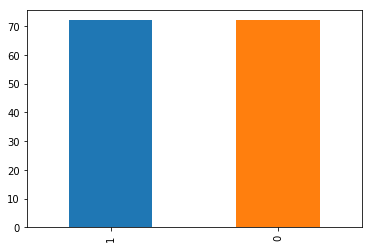

In [30]:
train[(train['Sex']=='female')&(train['Pclass']==3)]['Survived'].value_counts().plot(kind='bar')

In [31]:
train.groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  33.978723  0.553191  0.457447   
       2        443.105263  0.921053  28.703947  0.486842  0.605263   
       3        399.729167  0.500000  23.572917  0.895833  0.798611   
male   1        455.729508  0.368852  38.995246  0.311475  0.278689   
       2        447.962963  0.157407  30.512315  0.342593  0.222222   
       3        455.515850  0.135447  26.911873  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

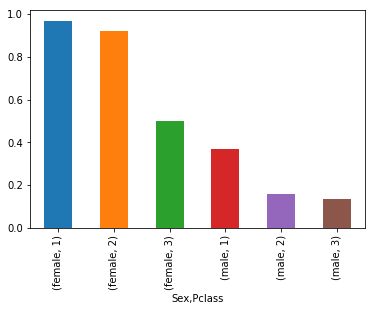

In [32]:
mean_values_df=train.groupby(['Sex','Pclass']).mean()
mean_values_df['Survived'].plot(kind='bar')